In [24]:
import numpy as np
import matplotlib.pyplot as plt

#IGNORE
X_train = np.load('Dataset/Dataset/Npy_files/x_train.npy')
X_test = np.load('Dataset/Dataset/Npy_files/x_test.npy')

y_train = np.load('Dataset/Dataset/Npy_files/y_train.npy')
y_test = np.load('Dataset/Dataset/Npy_files/y_test.npy')

In [5]:
#Shape:
print("X_train: ", X_train.shape, "X_test: ", X_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

#total 7011 train dataset, 19 EEG channel, 500 timestamp (1sec = 500 Hz)
#total 799 test dataset, 19 EEG channel, 500 timestamp (1sec = 500 Hz)
#total 7011 train label, 0,1,2,3 labels (123 is seizure, 0 is normal state --> I will change it to binary label grouping 123 to 1)
#total 799 test label , same above

X_train:  (7011, 19, 500) X_test:  (779, 19, 500) y_train:  (7011,) y_test:  (779,)


Labeled Data Information:

Labeling the EEG records as normal or lesional data is crucial for machine learning applications. Therefore, the available EEG datasets have been processed, separated and labeled as normal or lesional data. 

To have uniform information across all records, the data of channels Cz and Pz have been omitted in the labeling process. 

The classified data are categorized as matrices of size 19x500. 19 representing the number of channels and 500 respesenting one second duration as the sampling rate is 500Hz. The labeling will be as follows

"I will change 123 label different seizure type into one same seizure label"
-	1: for Complex Partial Seizures 
(3034 matrices of size 19x500 corresponding to 3034 seconds of complex partial seizures)
-	2: for Electrographic Seizures
(705 matrices of size 19x500 correponding to 750 seconds of electrographic seizures)
-	3: for Video-detected Seizures with no visual change over EEG
(111 matrices of size 19x500 corresponding to 111 seconds of Video-detected Seizures with no visual change over EEG)
-	0: for Normal data
(3895 matrices of size 19x500 corresponding to 3895 seconds of normal data, 3895 is the total duration of all available seizures to create the balance between normal and lesional data).   
The total labeled data will therefore have a total size of 7790x19x500 (7790 is the summation of the above seconds, normal and seizures). The data will be split into train and test data, 7011 (90%) and 779 (10%) respectively. The data is avaible in both numpy (.npy) and Matlab (.mat) format, saved as shown below:

-	x_train, size 7011 x 19 x 500 with its respective labels y_train 

-	x_test, size 779 x 19 x 500 with its respective labels y_test 


In [68]:
new_y_train = np.array([1 if i >= 1 else 0 for i in y_train])
new_y_test= np.array([1 if i >= 1 else 0 for i in y_test])


Text(0.5, 1.0, 'Training dataset')

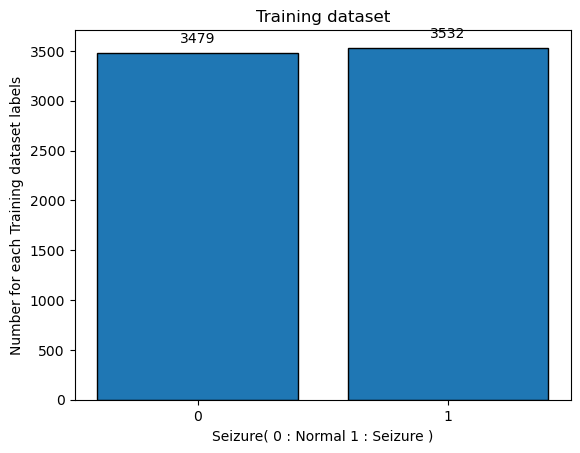

In [69]:

# Create the histogram
n, bins, patches = plt.hist(new_y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)

# Annotate each bar with the count
for count, patch in zip(n, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5),  #5pt vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')
# Set x-ticks to show 0 and 1
plt.xticks([0, 1])
plt.xlabel('Seizure( 0 : Normal 1 : Seizure )')
plt.ylabel("Number for each Training dataset labels")
plt.title('Training dataset')

Text(0.5, 1.0, 'Test dataset')

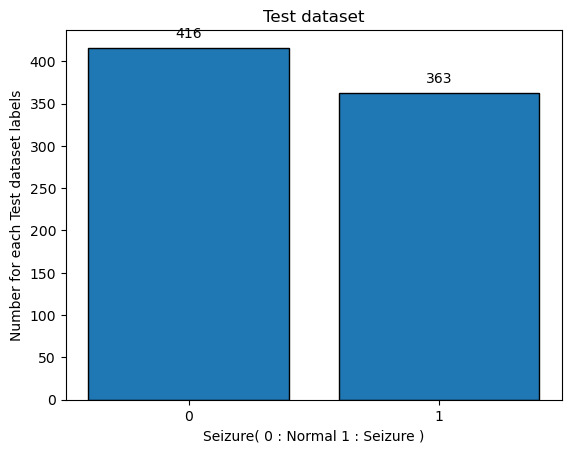

In [70]:

# Create the histogram
n, bins, patches = plt.hist(new_y_test, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)


# Annotate each bar with the count
for count, patch in zip(n, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5),  #5pt vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')
# Set x-ticks to show 0 and 1
plt.xticks([0, 1])
plt.xlabel('Seizure( 0 : Normal 1 : Seizure )')
plt.ylabel("Number for each Test dataset labels")
plt.title('Test dataset')

In [102]:
import mne
from mne.time_frequency import tfr_morlet

channel_index = 0 #there is 0~18 (total 19channel)
sampling_rate = 500  # Hz, as mentioned in preprocessing (500HZ)

#MNE Info object
info = mne.create_info(ch_names=['EEG'], sfreq=sampling_rate, ch_types=['eeg'])

#Extract the data for the selected epoch and channel
data = X_train[:, channel_index, :].reshape(1, 1, -1)  # Shape: (n_epochs, n_channels, n_times) - total epoch=7000

#create Epochs object
epochs = mne.EpochsArray(data, info)

#frequency of interest : 1~ 50
freqs = np.arange(1, 50, 1)  # 1 to 50 Hz

n_cycles = freqs / 2.  

# Compute the TFR using Morlet wavelets
power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


Applying baseline correction (mode: logratio)


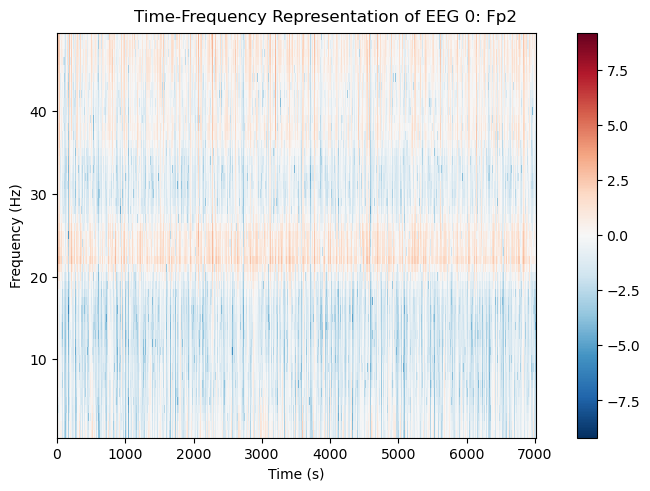

In [103]:
# Plot the TFR for only first channel = EEG 0 (there is more channel but we will only do one now)
power.plot([0], baseline=(None, 0), mode='logratio', title='Time-Frequency Representation of EEG 0: Fp2')
plt.show()

In [111]:
np.save('binary_y_train',new_y_train)
np.save('binary_y_test',new_y_test)

# THIS IS WHERE YOU START #
## Build your  Model (LSTM, CNN, Neural Network, XGBOOST, RF..etc)
## CHECK OHTER FILE